# Comparing actual and maxent correlations

Having trained independent and pairwise maxent models on averages and pairwise correlations in neural data, we want to see how well they predict higher-order correlations which they are not constrained to reproduce.

## Read in Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams["font.size"] = 14 

## Get expectations needed for models

In [3]:
corr3 = np.loadtxt("../results/correlations/stimulus_40_corr3s.csv", delimiter=",", dtype=float)
ind_corr3 = np.loadtxt("../results/correlations/stimulus_40_ind_corr3s.csv", delimiter=",", dtype=float)
ising_corr3s = np.loadtxt("../results/correlations/stimulus_40_ising_corr3s.csv", delimiter=",", dtype=float)

In [4]:
corr3.shape, ind_corr3.shape, ising_corr3s.shape

((9880, 10), (9880, 10), (9880, 10))

In [5]:
pks = np.loadtxt("../results/correlations/stimulus_40_pks.csv", delimiter=",", dtype=float)
ind_pks = np.loadtxt("../results/correlations/stimulus_40_ind_pks.csv", delimiter=",", dtype=float)
ising_pks = np.loadtxt("../results/correlations/stimulus_40_ising_pks.csv", delimiter=",", dtype=float)

In [6]:
pks.shape, ind_pks.shape, ising_pks.shape

((41, 10), (41, 10), (41, 10))

# P(K)
## N = 40
We first compare the various trajectories for individual subsets, and then we look at the averages.

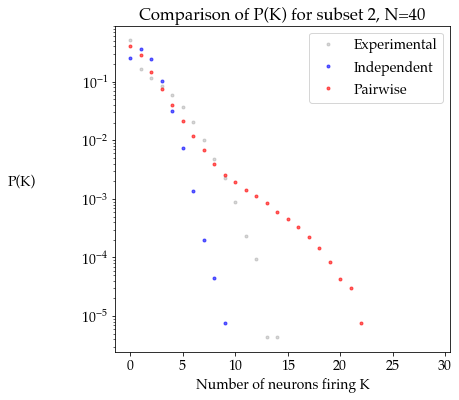

In [8]:
 rep = 2
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,pks[:top_K,rep],'.',color="gray",alpha=0.3)
plt.plot(Ks,ind_pks[:top_K,rep],".",color="blue",alpha=0.6)
plt.plot(Ks,ising_pks[:top_K,rep],".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title(f"Comparison of P(K) for subset {rep}, N=40")
plt.show()

In [9]:
def five_sum(data):
    quartiles = np.percentile(data, [0.25,0.5,0.75],axis=1)
    mins = np.min(data, axis=1)
    low_qs = quartiles[0]
    meds = quartiles[1]
    upp_qs = quartiles[2]
    maxs = np.max(data, axis=1)
    return mins, low_qs, meds, upp_qs, maxs

Median trajectories (-) with the distance to the minium and maximum points illustrated as lines.

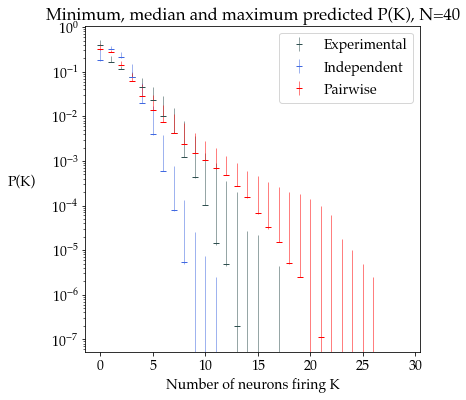

In [10]:
def plot_pK_bars(data, color):
    mins, low_qs, meds, upp_qs, maxs = five_sum(data)
    low_diff = meds - mins
    upp_diff = maxs - meds
    Ks = np.arange(data.shape[0])
    plt.errorbar(Ks, meds[:top_K],yerr=np.stack((low_diff[:top_K], upp_diff[:top_K])), 
                 fmt="_", color=color,ecolor=color,elinewidth=0.5)

top_K = 30
plt.figure(figsize=(6,6))
plot_pK_bars(pks[:top_K],'darkslategrey')
plot_pK_bars(ind_pks[:top_K], 'royalblue')
plot_pK_bars(ising_pks[:top_K], 'red')
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=30)
plt.title("Minimum, median and maximum predicted P(K), N=40")
plt.show()

In [11]:
np.min(ind_pks[:top_K])

0.0

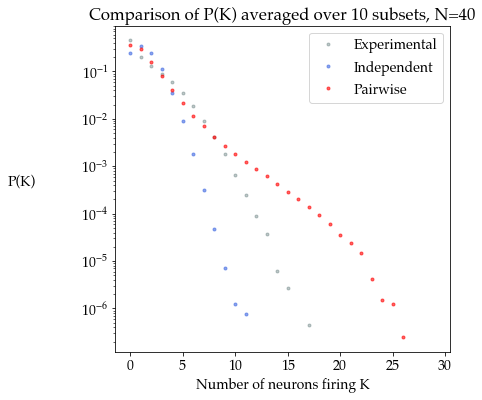

In [12]:
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,np.mean(pks[:top_K],axis=1),'.',color="darkslategrey",alpha=0.3)
plt.plot(Ks,np.mean(ind_pks[:top_K],axis=1),".",color="royalblue",alpha=0.6)
plt.plot(Ks,np.mean(ising_pks[:top_K],axis=1),".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=40")
plt.show()

## N = 100

In [13]:
pks = np.loadtxt("../results/correlations/stimulus_100_pks.csv", delimiter=",", dtype=float)
ind_pks = np.loadtxt("../results/correlations/stimulus_100_ind_pks.csv", delimiter=",", dtype=float)
ising_pks = np.loadtxt("../results/correlations/stimulus_100_ising_pks.csv", delimiter=",", dtype=float)

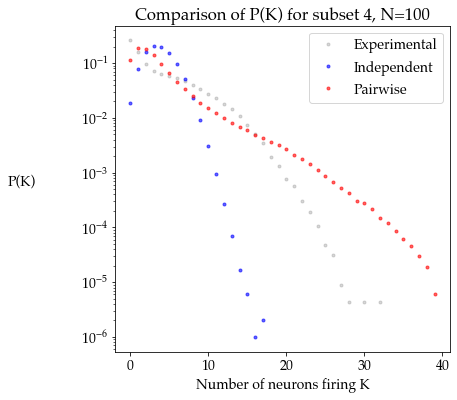

In [14]:
rep = 4
plt.figure(figsize=(6,6))
top_K = 40 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,pks[:top_K,rep],'.',color="gray",alpha=0.3)
plt.plot(Ks,ind_pks[:top_K,rep],".",color="blue",alpha=0.6)
plt.plot(Ks,ising_pks[:top_K,rep],".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title(f"Comparison of P(K) for subset {rep}, N=100")
plt.show()

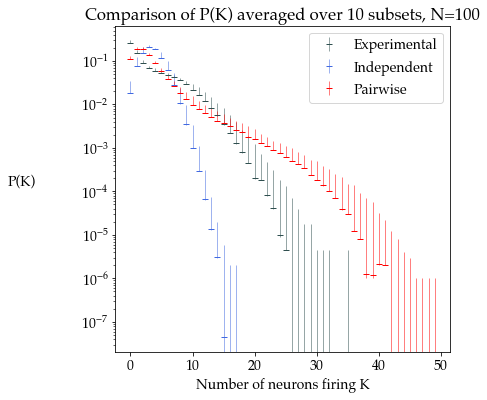

In [17]:
plt.figure(figsize=(6,6))
top_K = 50 # should return first 
Ks = np.arange(top_K)
plot_pK_bars(pks[:top_K],'darkslategrey')
plot_pK_bars(ind_pks[:top_K], 'royalblue')
plot_pK_bars(ising_pks[:top_K], 'red')
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=100")
plt.show()

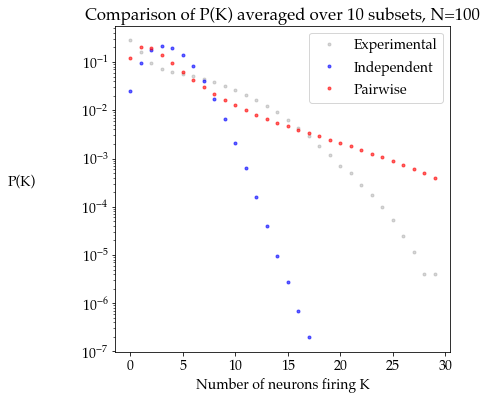

In [16]:
plt.figure(figsize=(6,6))
top_K = 30 # should return first 
Ks = np.arange(top_K)
plt.plot(Ks,np.mean(pks[:top_K],axis=1),'.',color="gray",alpha=0.3)
plt.plot(Ks,np.mean(ind_pks[:top_K],axis=1),".",color="blue",alpha=0.6)
plt.plot(Ks,np.mean(ising_pks[:top_K],axis=1),".",color="red",alpha=0.6)
plt.legend(['Experimental', 'Independent', 'Pairwise'])
plt.yscale('log')
plt.xlabel("Number of neurons firing K")
plt.ylabel("P(K)",rotation=0,labelpad=60)
plt.title("Comparison of P(K) averaged over 10 subsets, N=100")
plt.show()

## N = 10-20
We go from 10 to 20 and plot the difference between the experimental data and the independent and pairwise predictions $P(K)_{\text{indep/pairwise}} - P(K)_{exp}$ for each $K$

In [1]:
def load_pks(N):
    pks = np.loadtxt(f"../results/correlations/stimulus_{N}_pks.csv", delimiter=",", dtype=float)
    ind_pks = np.loadtxt(f"../results/correlations/stimulus_{N}_ind_pks.csv", delimiter=",", dtype=float)
    ising_pks = np.loadtxt(f"../results/correlations/stimulus_{N}_ising_pks.csv", delimiter=",", dtype=float)
    return pks, ind_pks, ising_pks

In [37]:
pks, ind_pks, ising_pks = load_pks(40)

In [38]:
def get_trunc_pks(pks,top_K):
    top_K = np.min((pks.shape[0],top_K))
    Ks = np.arange(top_K)
    return pks[:top_K], Ks

In [44]:
pks_trunc, Ks_trunc = get_trunc_pks(pks,50)
pks_trunc.shape, Ks_trunc.shape

((41, 10), (41,))

### Difference between the independent model and experimental data

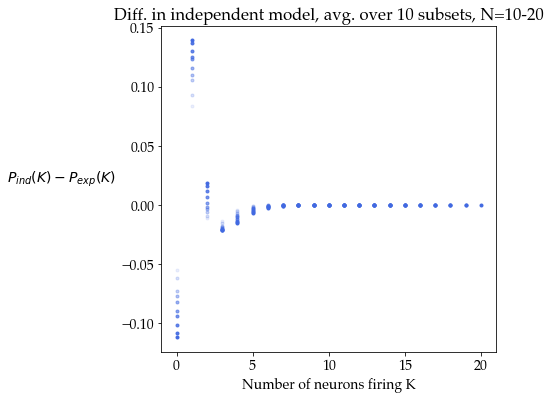

In [53]:
Ns = np.arange(10,21) # redefine this to be 10-20
trunc = 30 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, ind_pks, _ = load_pks(N)
    dff_ks, Ks = get_trunc_pks(ind_pks - pks, trunc)  # when this is positive, model over predicts and negative - under-predicts
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_ks,axis=1),'.',color="royalblue", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in independent model, avg. over 10 subsets, N={Ns[0]}-{Ns[-1]}")
plt.show()

In [55]:
np.abs(-3)

3

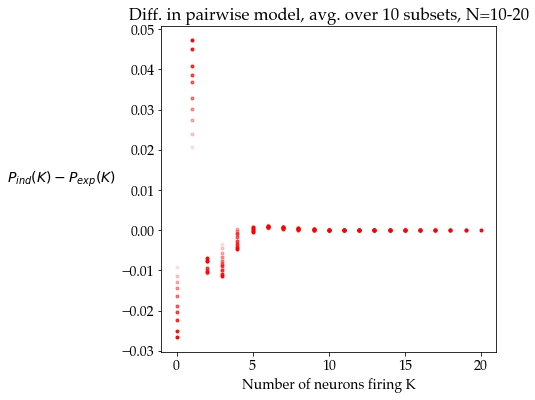

In [59]:
Ns = np.arange(10,21) # redefine this to be 10-20
trunc = 30 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, _, ising_pks = load_pks(N)
    dff_ks, Ks = get_trunc_pks(ising_pks - pks, trunc)  # when this is positive, model over predicts and negative - under-predicts
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_ks,axis=1),'.',color="red", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in pairwise model, avg. over 10 subsets, N={Ns[0]}-{Ns[-1]}")
plt.show()

Trying to combine the two

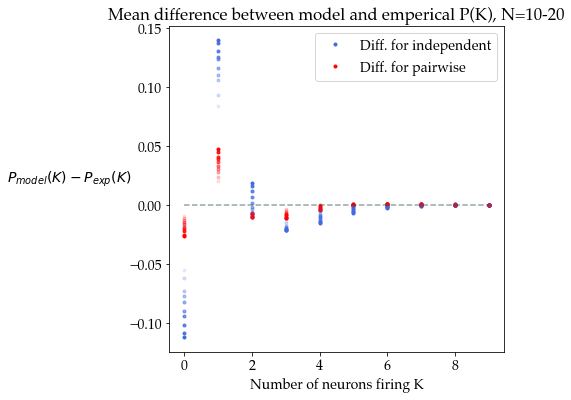

In [78]:
Ns = np.arange(10,21) # redefine this to be 10-20
trunc = 10 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, indep_pks, ising_pks = load_pks(N)
    dff_indep_ks, Ks = get_trunc_pks(indep_pks - pks, trunc) 
    dff_ising_ks, Ks = get_trunc_pks(ising_pks - pks, trunc) 
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_indep_ks,axis=1),'.',color="royalblue", alpha=alpha)
    plt.plot(Ks,np.mean(dff_ising_ks,axis=1),'.',color="red", alpha=alpha)
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{model}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Mean difference between model and emperical P(K), N={Ns[0]}-{Ns[-1]}")
plt.legend(['Diff. for independent', 'Diff. for pairwise'])
plt.plot(np.arange(trunc), np.zeros(trunc),"--",color="darkslategrey",alpha=0.5)
plt.show()

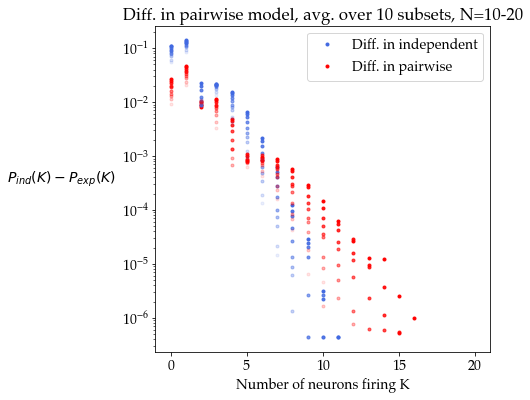

In [68]:
Ns = np.arange(10,21) # redefine this to be 10-20
trunc = 30 # truncate the Ks at this number
plt.figure(figsize=(6,6))

for N in Ns[-1::-1]:
    pks, indep_pks, ising_pks = load_pks(N)
    
    dff_indep_ks = np.abs(indep_pks - pks)
    dff_ising_ks = np.abs(ising_pks - pks)
    dff_indep_ks, Ks = get_trunc_pks(dff_indep_ks, trunc) 
    dff_ising_ks, Ks = get_trunc_pks(dff_ising_ks, trunc) 
    alpha =  (N - np.min(Ns))/(np.max(Ns)-np.min(Ns) )
    plt.plot(Ks,np.mean(dff_indep_ks,axis=1),'.',color="royalblue", alpha=alpha)
    plt.plot(Ks,np.mean(dff_ising_ks,axis=1),'.',color="red", alpha=alpha)
    plt.yscale("log")
    plt.xlabel("Number of neurons firing K")
    plt.ylabel("$P_{ind}(K)-P_{exp}(K)$",rotation=0,labelpad=60)
    plt.title(f"Diff. in pairwise model, avg. over 10 subsets, N={Ns[0]}-{Ns[-1]}")
plt.legend(['Diff. in independent', 'Diff. in pairwise'])
plt.show()